In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
Mileage = pd.read_csv('/content/Vehicle_Data.csv')
Mileage.head()



,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443


In [ ]:
Mileage.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
Mileage.isnull().sum()
Mileage= Mileage.fillna(Mileage['horsepower'].mean)
pd.options.display.max_columns=None
pd.options.display.max_rows=None
print(Mileage)




     origin  cylinders  displacement  horsepower  weight  acceleration  year  \
0         1          8         307.0       130.0    3504          12.0  1970   
1         1          8         350.0       165.0    3693          11.5  1970   
2         1          8         318.0       150.0    3436          11.0  1970   
3         1          8         304.0       150.0    3433          12.0  1970   
4         1          8         302.0       140.0    3449          10.5  1970   
5         1          8         429.0       198.0    4341          10.0  1970   
6         1          8         454.0       220.0    4354           9.0  1970   
7         1          8         440.0       215.0    4312           8.5  1970   
8         1          8         455.0       225.0    4425          10.0  1970   
9         1          8         390.0       190.0    3850           8.5  1970   
10        1          8         383.0       170.0    3563          10.0  1970   
11        1          8         340.0    

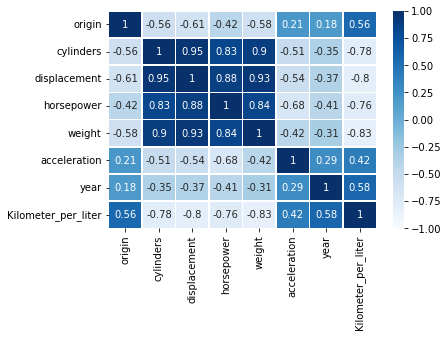

In [ ]:
sn.heatmap(data= Mileage.corr(),annot= True, linewidth= 0.5, cmap= 'Blues', cbar= True, vmin= -1, vmax= 1 )

In [ ]:
#Spliting the data and Target
X= Mileage.drop(['name','Kilometer_per_liter'], axis = 1)
Y= Mileage['Kilometer_per_liter']

In [ ]:
print(X)

     origin  cylinders  displacement  horsepower  weight  acceleration  year
0         1          8         307.0       130.0    3504          12.0  1970
1         1          8         350.0       165.0    3693          11.5  1970
2         1          8         318.0       150.0    3436          11.0  1970
3         1          8         304.0       150.0    3433          12.0  1970
4         1          8         302.0       140.0    3449          10.5  1970
5         1          8         429.0       198.0    4341          10.0  1970
6         1          8         454.0       220.0    4354           9.0  1970
7         1          8         440.0       215.0    4312           8.5  1970
8         1          8         455.0       225.0    4425          10.0  1970
9         1          8         390.0       190.0    3850           8.5  1970
10        1          8         383.0       170.0    3563          10.0  1970
11        1          8         340.0       160.0    3609           8.0  1970

In [ ]:
print(Y)

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
5       6.377156
6       5.952012
7       5.952012
8       5.952012
9       6.377156
10      6.377156
11      5.952012
12      6.377156
13      5.952012
14     10.203449
15      9.353162
16      7.652587
17      8.928018
18     11.478880
19     11.053736
20     10.628593
21     10.203449
22     10.628593
23     11.053736
24      8.928018
25      4.251437
26      4.251437
27      4.676581
28      3.826293
29     11.478880
30     11.904024
31     10.628593
32     10.628593
33      8.077730
34      6.802299
35      7.227443
36      8.077730
37      7.652587
38      5.952012
39      5.952012
40      5.952012
41      5.952012
42      5.101724
43      5.526868
44      5.526868
45      7.652587
46      9.353162
47      8.077730
48      7.652587
49      9.778305
50     11.904024
51     12.754311
52     12.754311
53     13.179455
54     14.880030
55     11.478880
56     11.053736
57     10.203449
58     10.6285

In [ ]:
#Spliting Training and Test Data
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size= 0.1, random_state= 2)

In [ ]:
#Loading the linear Regression model
lin_reg_model= LinearRegression()

In [ ]:
lin_reg_model.fit(X_train, Y_train) 

LinearRegression()

In [ ]:
Test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#R squared Error
error_score= metrics.r2_score(Y_test, Test_data_prediction)
print('R Squared Error:',error_score)

R Squared Error: 0.9177600190999959


Text(0.5, 1.0, 'Actual Vs Predicted Mileage')

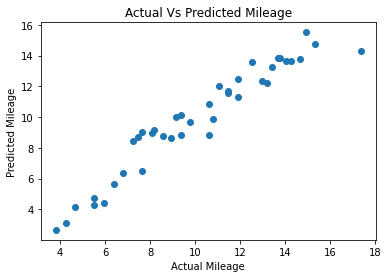

In [ ]:
#Visualization
plt.scatter(Y_test, Test_data_prediction)
plt.xlabel('Actual Mileage')
plt.ylabel('Predicted Mileage')
plt.title('Actual Vs Predicted Mileage')

In [25]:
#Sum of Squared Error
SSE= metrics.mean_squared_error(Y_test, Test_data_prediction)
print('SSE:',SSE)

SSE: 0.9405156604934234


In [31]:
#Mean Absolute Error
MAE= metrics.mean_absolute_error(Y_test, Test_data_prediction)
print('MAE:',MAE)

MAE: 0.7874410918818753


In [33]:
#Mean Squared Log Error
MSLE= metrics.mean_squared_log_error(Y_test, Test_data_prediction)
print('MSLE:',MSLE)

MSLE: 0.01254749477815395
